## cGAN generate LiDAR

In [1]:
import os
import io
import cv2
import copy
import math
import wandb
import random
import numpy as np
import pickle as pkl
from collections import deque
from tqdm import tqdm, trange
from typing import Deque, Dict, List, Tuple
import matplotlib.pyplot as plt


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader, random_split



In [2]:
def laser_visual_one(laser, axs, label=None, range_limit=4.9, m_size=5, f_size=20):
    angle = 120
    xp = []
    yp = []
    for r in laser:
        if r <= range_limit:
            yp.append(r * math.cos(math.radians(angle)))
            xp.append(r * math.sin(math.radians(angle)))
        angle -= 1
    axs.set_xlim([-6,6])
    axs.set_ylim([-6,6])
    axs.plot(xp,yp,'x', markersize=m_size, label=label)
    
    if label is not None:
        axs.set_title(label, fontsize=f_size)

## visualize 1

In [3]:
folder = 'demo5'
with open('visual_demo/%s/laser.pkl'%folder, 'rb') as f:
    laser = pkl.load(f)

with open('visual_demo/%s/mm.pkl'%folder, 'rb') as f:
    mm = pkl.load(f)

with open('visual_demo/%s/cGAN.pkl'%folder, 'rb') as f:
    cGAN = pkl.load(f)

with open('visual_demo/%s/vae.pkl'%folder, 'rb') as f:
    vae = pkl.load(f)

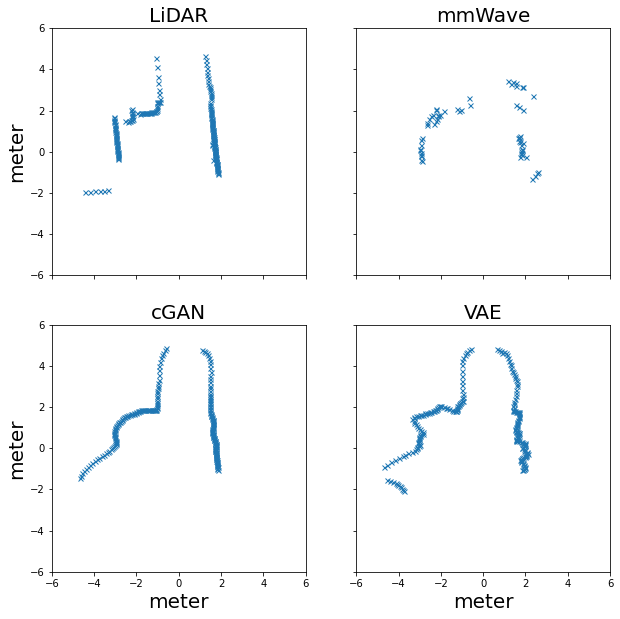

In [4]:
f_size = 20
fig_size = 10
        
fig, axs = plt.subplots(2, 2)
fig.set_figheight(fig_size)
fig.set_figwidth(fig_size)

laser_visual_one(laser, axs[0,0], 'LiDAR', f_size=f_size)
# axs[0, 0].set_title('Axis [0,0]')

laser_visual_one(mm, axs[0,1], 'mmWave', f_size=f_size)
# axs[0, 1].set_title('Axis [0,1]')

laser_visual_one(cGAN, axs[1,0], 'cGAN', f_size=f_size)
# axs[1, 0].set_title('Axis [1,0]')

laser_visual_one(vae, axs[1,1], 'VAE', f_size=f_size)
# axs[1, 1].set_title('Axis [1,1]')

for ax in axs.flat:
    ax.set_xlabel('meter', fontsize=f_size)
    ax.set_ylabel('meter', fontsize=f_size)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
# ax.legend(prop={'size': 18}, bbox_to_anchor=(0.3, 0.9))
# ax.legend(loc='lower right', prop={'size': 16})


plt.show()

## visualize 4

In [5]:
demos = []
names = ['mm', 'vae', 'cGAN', 'laser']

for k in range(4):
    demo = []
    for name in names:
        file = 'visual_demo/demo%d/%s.pkl'%(k+1, name)
        with open(file, 'rb') as f:
            demo.append(pkl.load(f))
        print('load %s'%file)
    demos.append(demo)



load visual_demo/demo1/mm.pkl
load visual_demo/demo1/vae.pkl
load visual_demo/demo1/cGAN.pkl
load visual_demo/demo1/laser.pkl
load visual_demo/demo2/mm.pkl
load visual_demo/demo2/vae.pkl
load visual_demo/demo2/cGAN.pkl
load visual_demo/demo2/laser.pkl
load visual_demo/demo3/mm.pkl
load visual_demo/demo3/vae.pkl
load visual_demo/demo3/cGAN.pkl
load visual_demo/demo3/laser.pkl
load visual_demo/demo4/mm.pkl
load visual_demo/demo4/vae.pkl
load visual_demo/demo4/cGAN.pkl
load visual_demo/demo4/laser.pkl


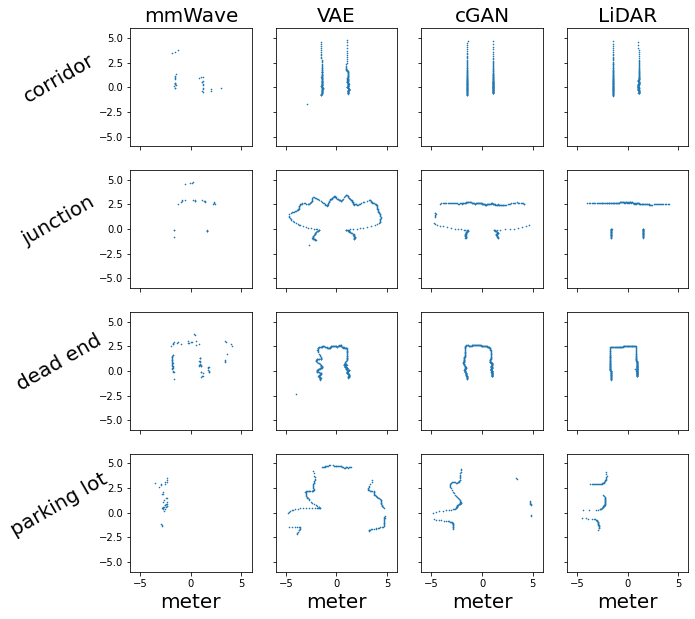

In [7]:
f_size = 20
fig_size = 10

fig, axs = plt.subplots(4, 4)
fig.set_figheight(fig_size)
fig.set_figwidth(fig_size)

for i in range(4):
    for k in range(4):
        laser_visual_one(demos[i][k], axs[i, k], m_size=1)
    
fig_names = ['mmWave', 'VAE', 'cGAN', 'LiDAR']
for i in range(4):
    axs[0, i].set_title(fig_names[i], fontsize=f_size)

places = ['corridor', 'junction', 'dead end', 'parking lot']
for i, ax in enumerate(axs.flat):
    ax.set_xlabel('meter', fontsize=f_size)
    ax.set_ylabel('%s'%(places[i//4]), fontsize=f_size, rotation=30)
    ax.yaxis.set_label_coords(-0.55, 0.5)

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
# ax.legend(prop={'size': 18}, bbox_to_anchor=(0.3, 0.9))
# ax.legend(loc='lower right', prop={'size': 16})


plt.show()

fig.savefig('demo.png', dpi=200)
